In [1]:
import openeo
import rasterio
import matplotlib.pyplot as plt

In [2]:
# Connect to openEO back-end.
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

Authenticated using refresh token.


In [3]:
# Load data cube from TERRASCOPE_S2_NDVI_V2 collection.
cube = connection.load_collection(
    "TERRASCOPE_S2_NDVI_V2",
    spatial_extent={"west": 5.05, "south": 51.21, "east": 5.1, "north": 51.23},
    temporal_extent=["2022-05-01", "2022-05-30"],
    bands=["NDVI_10M"],
)

In [4]:
# Rescale digital number to physical values and take temporal maximum.
cube = cube.apply(lambda x: 0.004 * x - 0.08).max_time()

In [5]:
cube.download("ndvi-max.tiff")

In [6]:
with rasterio.open("ndvi-max.tiff") as ds:
    data = ds.read(1)

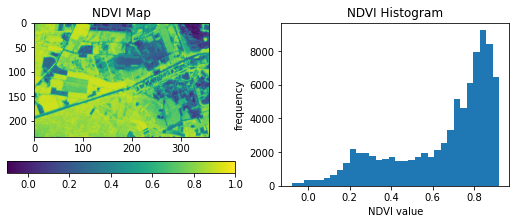

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 3))
im = ax1.imshow(data, vmin=-0.1, vmax=1)
plt.colorbar(im, ax=ax1, orientation="horizontal")
ax1.set_title("NDVI Map")
ax2.hist(data.flat, bins=32)
ax2.set_title("NDVI Histogram")
ax2.set_xlabel("NDVI value")
ax2.set_ylabel("frequency");